In [2]:
from __future__ import division, print_function, unicode_literals

import numpy as np
np.random.seed(69)
import os
import pandas as pd

def load_data():
    csv_path = os.path.join("insurance.csv")
    return pd.read_csv(csv_path)
insurance = load_data()
insurance.head()

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


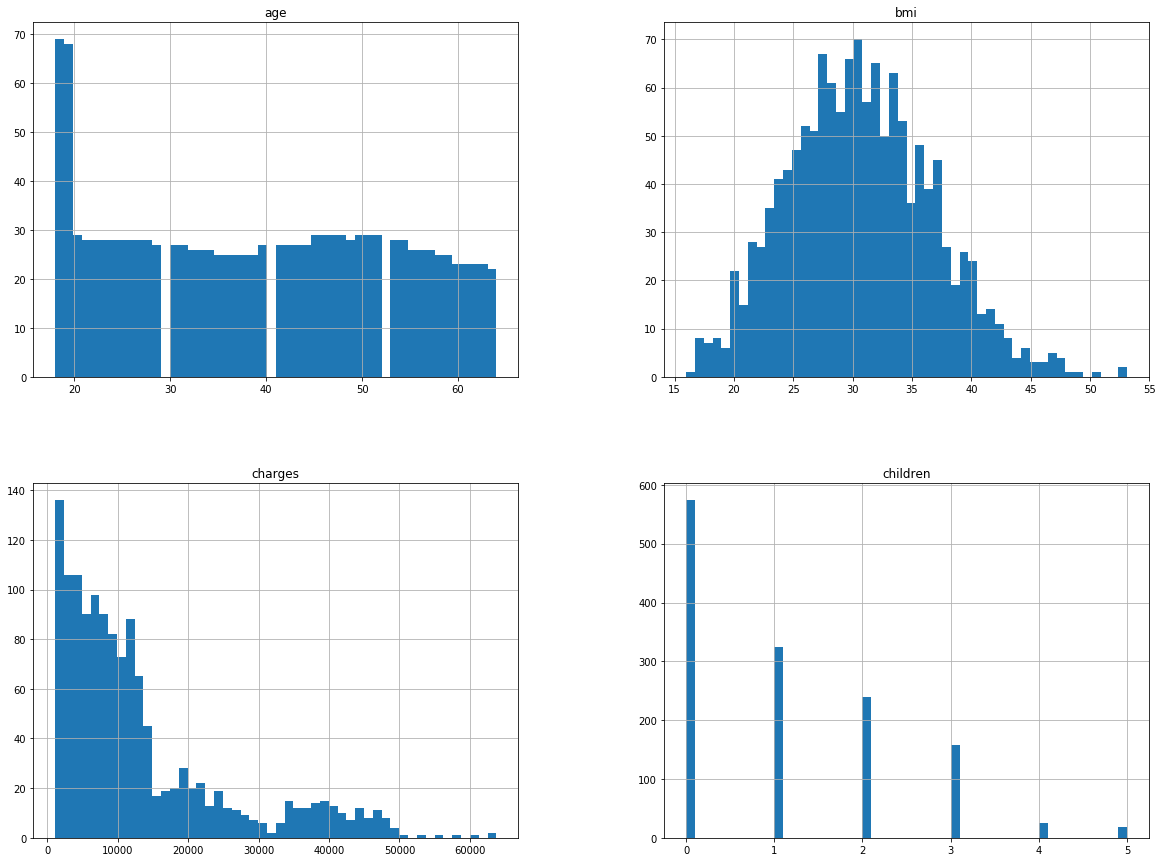

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
insurance.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(insurance, test_size = 0.2, random_state = 69)
train_set.head()

,age,sex,bmi,children,smoker,region,charges
55,58,male,36.955,2,yes,northwest,47496.49445
1334,18,female,31.920,0,no,northeast,2205.98080
852,46,female,35.530,0,yes,northeast,42111.66470
738,23,male,31.730,3,yes,northeast,36189.10170
1132,57,male,40.280,0,no,northeast,20709.02034


In [6]:
test_set.head()

,age,sex,bmi,children,smoker,region,charges
780,30,male,24.40,3,yes,southwest,18259.21600
1146,60,male,32.80,0,yes,southwest,52590.82939
1032,30,female,27.93,0,no,northeast,4137.52270
1045,43,female,24.70,2,yes,northwest,21880.82000
985,44,female,25.80,1,no,southwest,7624.63000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104b8c278>,
      dtype=object)

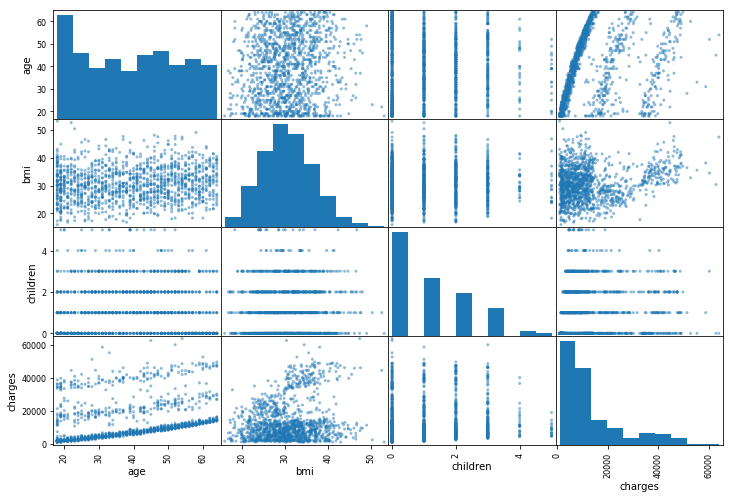

In [7]:
from pandas.plotting import scatter_matrix
attributes = ["age", "bmi", "children",
              "charges"]
scatter_matrix(insurance[attributes], figsize=(12, 8))

In [17]:
insurance_labels = train_set["charges"].copy()
# print(insurance_labels)
insurance_cat = insurance[['smoker']]
insurance_cat.head(10)
# insurance_num = insurance.drop('sex', axis=1)
# insurance_num.median().values

,smoker
0,yes
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [18]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(insurance_cat)
housing_cat_1hot
housing_cat_1hot.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])